In [1]:


import numpy as np
import pandas as pd

# to split the datasets
from sklearn.model_selection import train_test_split



In [3]:
# load dataset

data = pd.read_csv(
    "housprince.csv",
    usecols=["Neighborhood", "Exterior1st", "Exterior2nd", "SalePrice"],
)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [4]:
# lets have look how many labels each variable has 
for col in data.columns:
    print(col,":",len(data[col].unique()),'labels')

Neighborhood : 25 labels
Exterior1st : 15 labels
Exterior2nd : 16 labels
SalePrice : 663 labels


In [5]:
# let's explore the unique categories
data["Neighborhood"].unique()


array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [6]:
# Select top or most frequetn categories based on train data
X_train, X_test, y_train, y_test = train_test_split(
    data[["Neighborhood", "Exterior1st", "Exterior2nd"]],  # predictors
    data["SalePrice"],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [8]:
# Limitations: Does not preserve information from train data to propagate test data
X_train['Neighborhood'].value_counts().sort_values(ascending=False)

Neighborhood
NAmes      151
CollgCr    105
OldTown     73
Edwards     71
Sawyer      61
Somerst     56
Gilbert     55
NWAmes      51
NridgHt     51
SawyerW     45
BrkSide     41
Mitchel     36
Crawfor     35
Timber      30
NoRidge     30
ClearCr     24
IDOTRR      24
SWISU       18
StoneBr     16
Blmngtn     12
MeadowV     12
BrDale      10
NPkVill      7
Veenker      6
Blueste      2
Name: count, dtype: int64

In [9]:
# let's make a list with the most frequent categories of the variable

top_10 = [
    x
    for x in X_train["Neighborhood"]
    .value_counts()
    .sort_values(ascending=False)
    .head(10)
    .index
]

top_10


['NAmes',
 'CollgCr',
 'OldTown',
 'Edwards',
 'Sawyer',
 'Somerst',
 'Gilbert',
 'NWAmes',
 'NridgHt',
 'SawyerW']

In [10]:
# and now we make the 10 binary variables

for label in top_10:
    X_train["Neighborhood" + "_" + label] = np.where(
        X_train["Neighborhood"] == label, 1, 0
    )

    X_test["Neighborhood" + "_" + label] = np.where(
        X_test["Neighborhood"] == label, 1, 0
    )

# let's visualise the result
X_train[["Neighborhood"] + ["Neighborhood" + "_" + c for c in top_10]].head(10)


,Neighborhood,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_Gilbert,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_SawyerW
64,CollgCr,0,1,0,0,0,0,0,0,0,0
682,ClearCr,0,0,0,0,0,0,0,0,0,0
960,BrkSide,0,0,0,0,0,0,0,0,0,0
1384,Edwards,0,0,0,1,0,0,0,0,0,0
1100,SWISU,0,0,0,0,0,0,0,0,0,0
416,Sawyer,0,0,0,0,1,0,0,0,0,0
1034,Crawfor,0,0,0,0,0,0,0,0,0,0
853,NAmes,1,0,0,0,0,0,0,0,0,0
472,Edwards,0,0,0,1,0,0,0,0,0,0
1011,Edwards,0,0,0,1,0,0,0,0,0,0


#### Group-Rare-Categories

In [11]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

pd.set_option(
    "display.max_columns", None
)  # to display the total number columns present in the dataset



In [13]:
# let's load the house price dataset

data = pd.read_csv("housprince.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:


# let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=["SalePrice"], axis=1),  # predictors
    data.SalePrice,  # target
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape



((1022, 80), (438, 80))

In [16]:
# variable with one dominant category
for col in X_train.columns:
    if X_train[col].dtypes=='O':
        if X_train[col].nunique() < 3:
            print(X_train.groupby(col)[col].count()/len(X_train))
            print()
            
            

Street
Grvl    0.004892
Pave    0.995108
Name: Street, dtype: float64

Alley
Grvl    0.029354
Pave    0.031311
Name: Alley, dtype: float64

Utilities
AllPub    0.999022
NoSeWa    0.000978
Name: Utilities, dtype: float64

CentralAir
N    0.068493
Y    0.931507
Name: CentralAir, dtype: float64

PoolQC
Ex    0.000978
Gd    0.001957
Name: PoolQC, dtype: float64



In [17]:
# the columns in the below list have only 4 different labels

cols = ["MasVnrType", "ExterQual", "BsmtCond"]

for col in cols:

    print(X_train.groupby(col)[col].count() / len(X_train))  # frequency
    print()

MasVnrType
BrkCmn     0.009785
BrkFace    0.294521
Stone      0.094912
Name: MasVnrType, dtype: float64

ExterQual
Ex    0.029354
Fa    0.011742
Gd    0.332681
TA    0.626223
Name: ExterQual, dtype: float64

BsmtCond
Fa    0.032290
Gd    0.045010
Po    0.001957
TA    0.897260
Name: BsmtCond, dtype: float64



In [18]:
# let's explore examples in which variables have several categories, say more than 10

multi_cat_cols = []

for col in X_train.columns:

    if X_train[col].dtypes == "O":  # if variable  is categorical

        if X_train[col].nunique() > 10:  # and has more than 10 categories

            multi_cat_cols.append(col)  # add to the list

            print(
                X_train.groupby(col)[col].count() / len(X_train)
            )  # and print the percentage of observations within each category

            print()

Neighborhood
Blmngtn    0.011742
Blueste    0.001957
BrDale     0.009785
BrkSide    0.040117
ClearCr    0.023483
CollgCr    0.102740
Crawfor    0.034247
Edwards    0.069472
Gilbert    0.053816
IDOTRR     0.023483
MeadowV    0.011742
Mitchel    0.035225
NAmes      0.147750
NPkVill    0.006849
NWAmes     0.049902
NoRidge    0.029354
NridgHt    0.049902
OldTown    0.071429
SWISU      0.017613
Sawyer     0.059687
SawyerW    0.044031
Somerst    0.054795
StoneBr    0.015656
Timber     0.029354
Veenker    0.005871
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng    0.014677
AsphShn    0.000978
BrkComm    0.000978
BrkFace    0.034247
CBlock     0.000978
CemntBd    0.038160
HdBoard    0.149706
ImStucc    0.000978
MetalSd    0.135029
Plywood    0.084149
Stone      0.001957
Stucco     0.016634
VinylSd    0.356164
Wd Sdng    0.144814
WdShing    0.020548
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng    0.016634
AsphShn    0.000978
Brk Cmn    0.003914
BrkFace    0.017613
CBlock     0

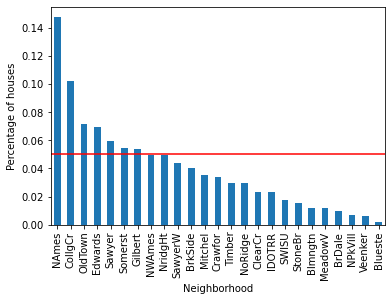

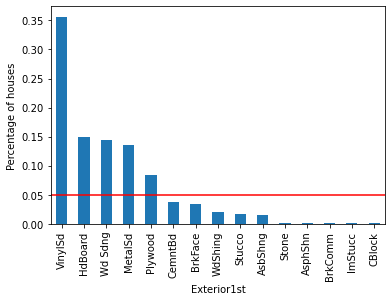

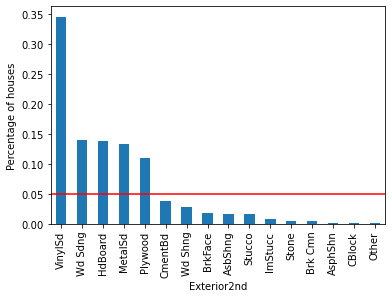

In [19]:
for col in ["Neighborhood", "Exterior1st", "Exterior2nd"]:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color="red")
    fig.set_ylabel("Percentage of houses")
    plt.show()


In [20]:
def find_non_rare_labels(df, variable, tolerance):

    temp = df.groupby([variable])[variable].count() / len(df)

    non_rare = [x for x in temp.loc[temp > tolerance].index.values]

    return non_rare

In [21]:
# non rare labels
find_non_rare_labels(X_train, "Neighborhood", 0.05)


['CollgCr', 'Edwards', 'Gilbert', 'NAmes', 'OldTown', 'Sawyer', 'Somerst']

In [22]:
# rare labels

[
    x
    for x in X_train["Neighborhood"].unique()
    if x not in find_non_rare_labels(X_train, "Neighborhood", 0.05)
]


['ClearCr',
 'BrkSide',
 'SWISU',
 'Crawfor',
 'Mitchel',
 'Timber',
 'MeadowV',
 'BrDale',
 'NWAmes',
 'NridgHt',
 'SawyerW',
 'NoRidge',
 'IDOTRR',
 'NPkVill',
 'StoneBr',
 'Blmngtn',
 'Veenker',
 'Blueste']

In [23]:
def rare_encoding(X_train, X_test, variable, tolerance):

    X_train = X_train.copy()
    X_test = X_test.copy()

    # find the most frequent category
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)

    # re-group rare labels
    X_train[variable] = np.where(
        X_train[variable].isin(frequent_cat), X_train[variable], "Rare"
    )

    X_test[variable] = np.where(
        X_test[variable].isin(frequent_cat), X_test[variable], "Rare"
    )

    return X_train, X_test

for variable in ["Neighborhood", "Exterior1st", "Exterior2nd"]:

    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)



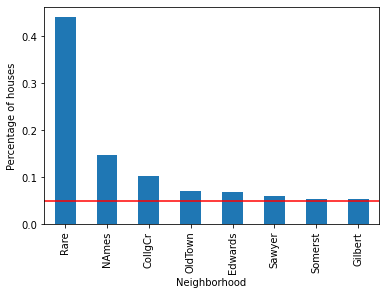

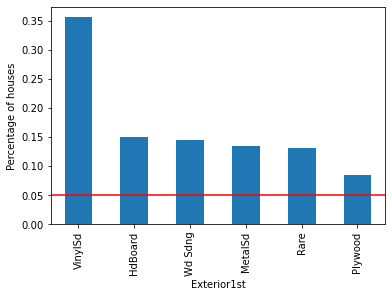

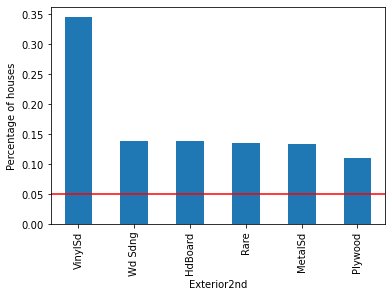

In [24]:
for col in ["Neighborhood", "Exterior1st", "Exterior2nd"]:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color="red")
    fig.set_ylabel("Percentage of houses")
    plt.show()

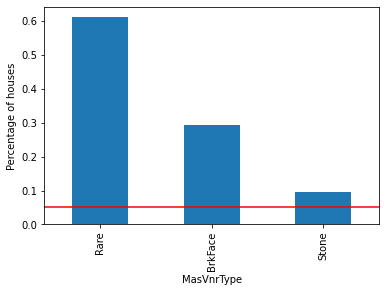

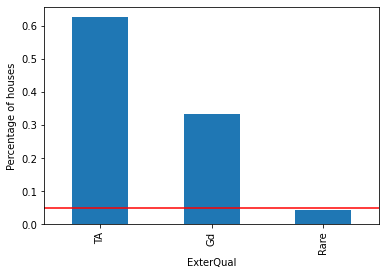

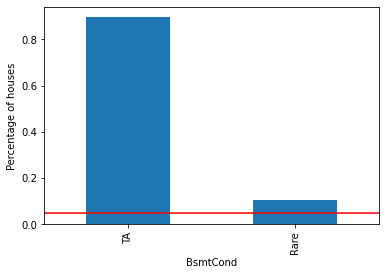

In [25]:
for variable in ["MasVnrType", "ExterQual", "BsmtCond"]:

    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

for col in ["MasVnrType", "ExterQual", "BsmtCond"]:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color="red")
    fig.set_ylabel("Percentage of houses")
    plt.show()

